In [1]:
import numpy as np 
import pandas as pd
import cv2 
from matplotlib import pyplot as plt 
from pylab import imread
from skimage.color import rgb2gray

In [2]:
def imshows(ImageData, LabelData, rows, cols, gridType = False):
  # Convert ImageData and LabelData to List
  from matplotlib import pyplot as plt
  ImageArray = list(ImageData)
  LabelArray = list(LabelData)
  if(rows == 1 & cols == 1):
    fig = plt.figure(figsize=(20,20))
  else:
    fig = plt.figure(figsize=(cols*8,rows*5))
        
  for i in range(1, cols * rows + 1):
      fig.add_subplot(rows, cols, i)
      image = ImageArray[i - 1]
      # If the channel number is less than 3, we display as grayscale image
      # otherwise, we display as color image
      if (len(image.shape) < 3):
          plt.imshow(image, plt.cm.gray)
          plt.grid(gridType)
      else:
          plt.imshow(image)
          plt.grid(gridType)
      plt.title(LabelArray[i - 1])
  plt.show()

def ShowThreeImages(IM1, IM2, IM3):
    imshows([IM1, IM2, IM3], ["Image 1","Image 2", "Image 3"], 1, 3)
def ShowTwoImages(IM1, IM2):
    imshows([IM1, IM2], ["Image 1","Image 2"], 1, 2)
def ShowOneImage(IM):
    imshows([IM], ["Image"], 1, 1)
def ShowListImages(listImage, row, col):
    listCaption = []
    for i in range(len(listImage)):
        listCaption.append(str(i))
    imshows(listImage,listCaption,row,col)

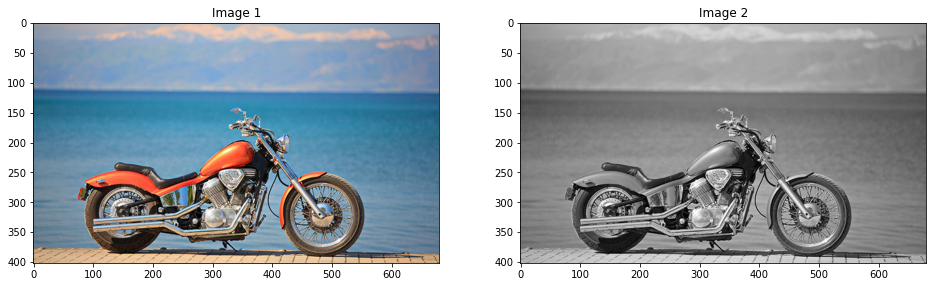

In [3]:
# Read Image 
image_color = imread("motocycle.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

# Display Image
ShowTwoImages(image_color, image_gray)

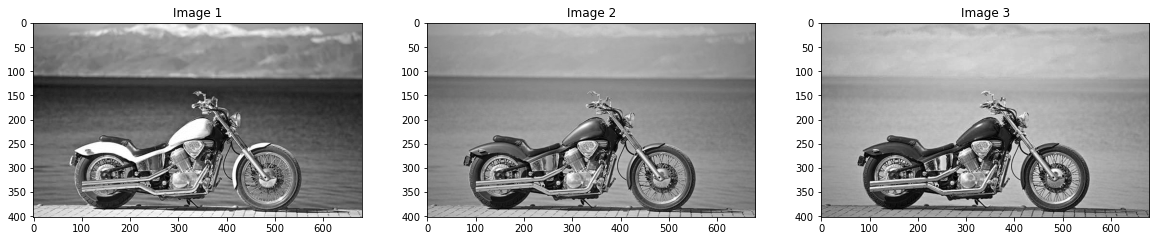

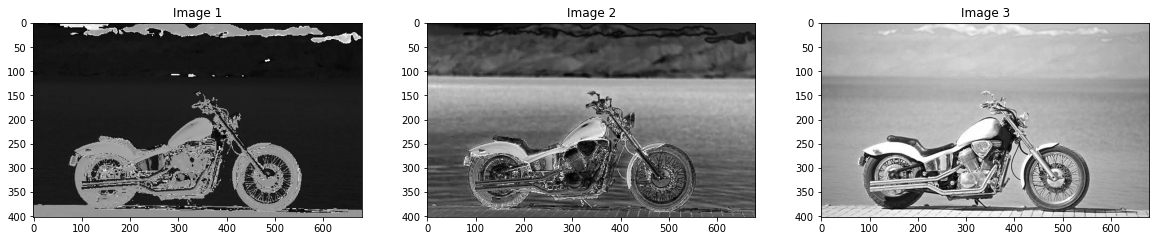

In [4]:
# Convert Image into HSV color spaces
image_hsv = cv2.cvtColor(image_color, cv2.COLOR_BGR2HSV)

# Show each channel R, G, and B
ShowThreeImages(image_color[:,:,0],image_color[:,:,1],image_color[:,:,2])

# Show each channel H , S and V
ShowThreeImages(image_hsv[:,:,0],image_hsv[:,:,1],image_hsv[:,:,2])

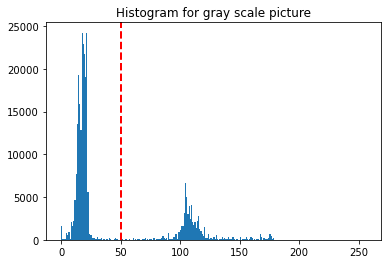

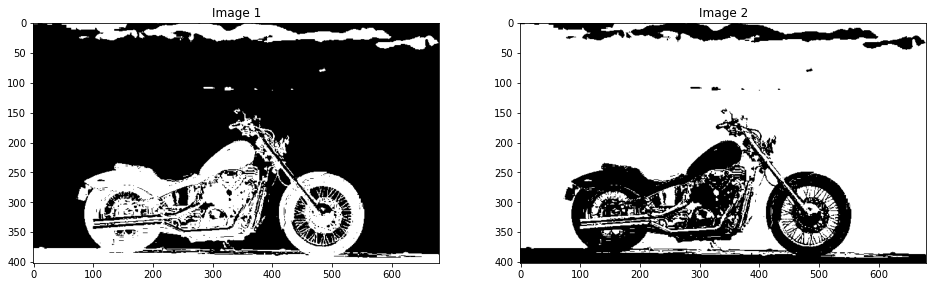

In [5]:
hue_img = image_hsv[:,:,0]
hue_threshold = 50

# Show Histogram of Hue Channel
hist = cv2.calcHist([hue_img],[0],None,[256],[0,256])
plt.hist(hue_img.ravel(),256,[0,256])
plt.axvline(x=hue_threshold, color='r', linestyle='dashed', linewidth=2)
plt.title('Histogram for gray scale picture')
plt.show()

# Use threshold to segment object by histogram
hue_binary01 = hue_img > hue_threshold
hue_binary02 = 1 - hue_binary01

ShowTwoImages(hue_binary01, hue_binary02)

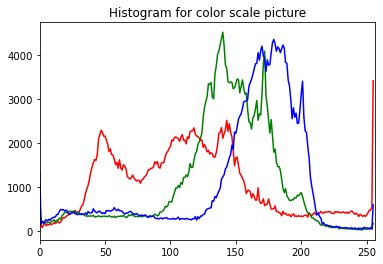

In [6]:
color = ('r', 'g', 'b')
for channel,col in enumerate(color):
    histr = cv2.calcHist([image_color],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Histogram for color scale picture')
plt.show()

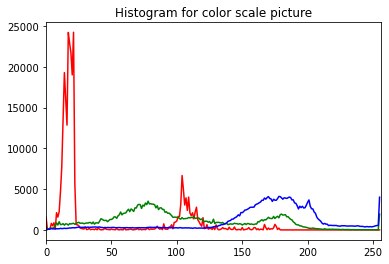

In [7]:
color = ('r', 'g', 'b')
for channel,col in enumerate(color):
    histr = cv2.calcHist([image_hsv],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Histogram for color scale picture')
plt.show()

In [8]:
def SegmentColorImageByMask(IM, Mask):    
    Mask = Mask.astype(np.uint8)
    result = cv2.bitwise_and(IM, IM, mask = Mask)
    return result

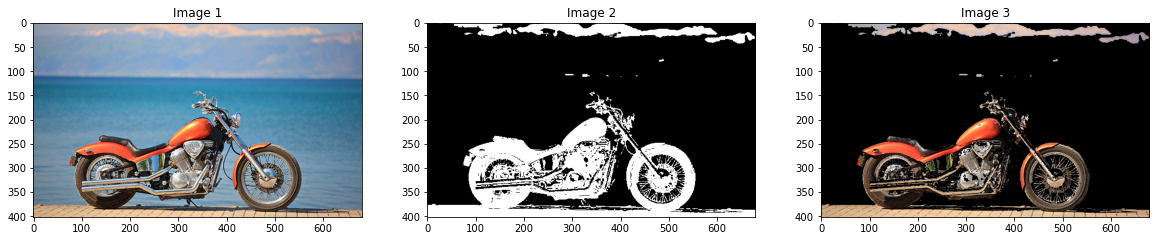

In [9]:
hue_binary01_rgb = SegmentColorImageByMask(image_color, hue_binary01)
ShowThreeImages(image_color, hue_binary01, hue_binary01_rgb)

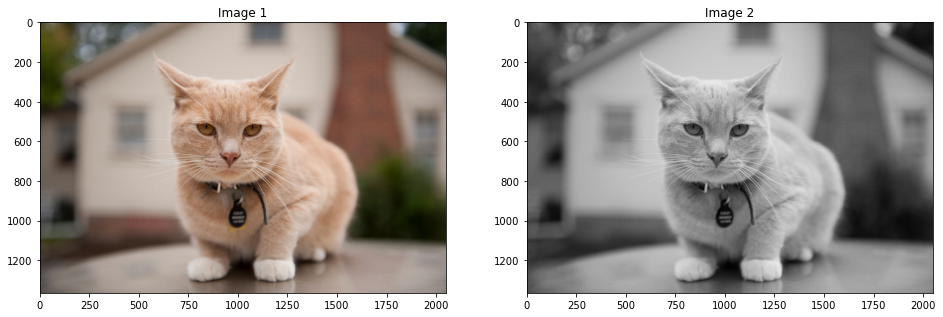

In [10]:
# Read Image 
image_color = imread("cat.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

# Display Image
ShowTwoImages(image_color, image_gray)

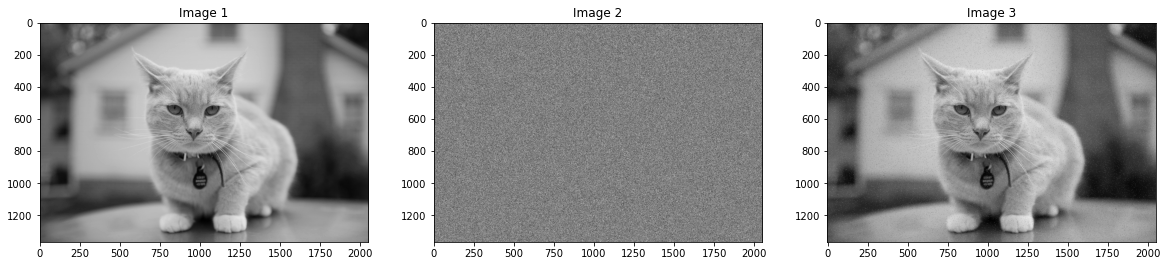

In [11]:
# Create Noise Image
noise = np.random.random(image_gray.shape)
image_noise = image_gray.copy()
image_noise[noise > 0.99] = 255
image_noise[noise < 0.01] = 0

ShowThreeImages(image_gray, noise, image_noise)

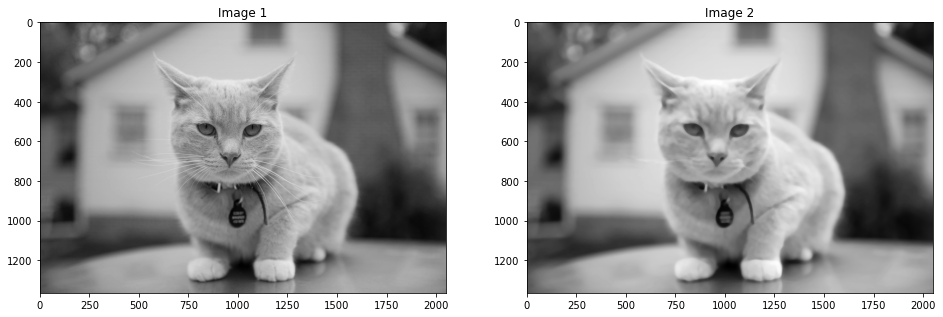

In [12]:
# Create Blurred Image
from skimage.filters.rank import median
from skimage.morphology import disk

image_blurred = median(image_gray, disk(10))
ShowTwoImages(image_gray, image_blurred)

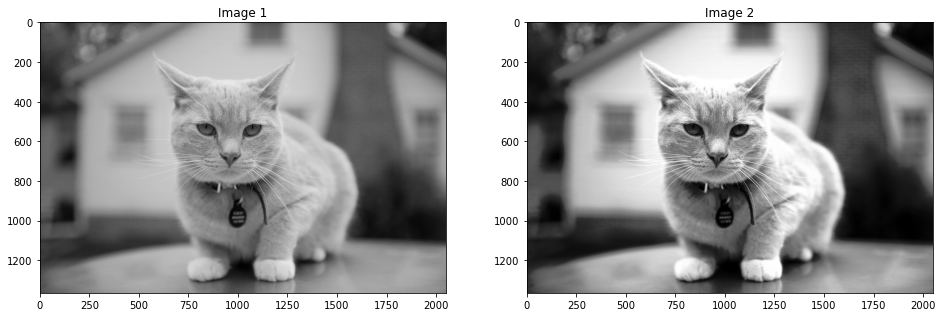

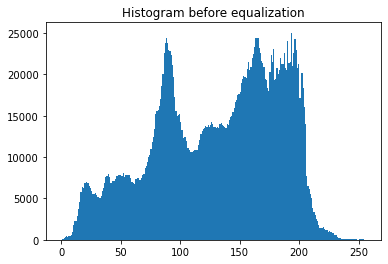

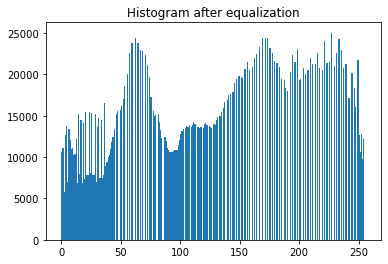

In [13]:
from skimage import data, exposure
image_equalization = exposure.equalize_hist(image_gray)
image_equalization = np.float32(image_equalization * 255)
ShowTwoImages(image_gray, image_equalization)

hist = cv2.calcHist([image_gray],[0],None,[256],[0,256])
plt.hist(image_gray.ravel(),256,[0,256])
plt.title('Histogram before equalization')
plt.show()

hist = cv2.calcHist([image_equalization],[0],None,[256],[0,256])
plt.hist(image_equalization.ravel(),256,[0,256])
plt.title('Histogram after equalization')
plt.show()

In [14]:
def histogram_equalize(img):
    r, g, b = cv2.split(img)
    red = cv2.equalizeHist(r)
    green = cv2.equalizeHist(g)
    blue = cv2.equalizeHist(b)
    return cv2.merge((red, green, blue))

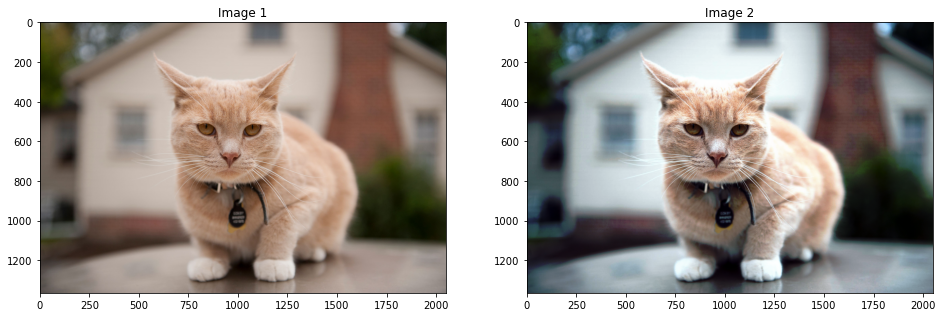

In [15]:
image_equalization_color = histogram_equalize(image_color)
ShowTwoImages(image_color, image_equalization_color)

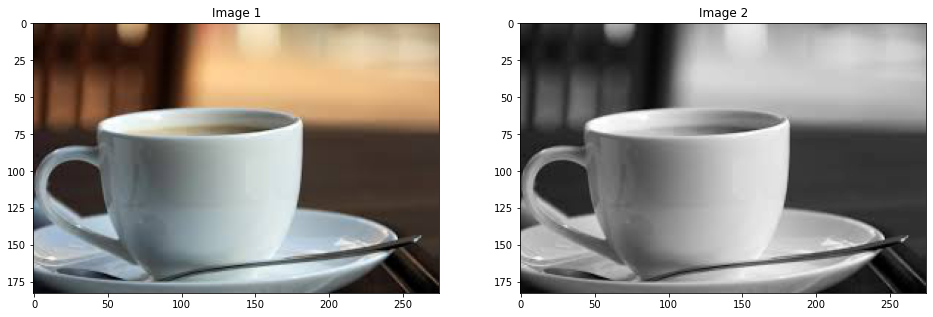

In [17]:
# Read Image 
image_color = imread("coffee.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)
# Display Image
ShowTwoImages(image_color, image_gray)

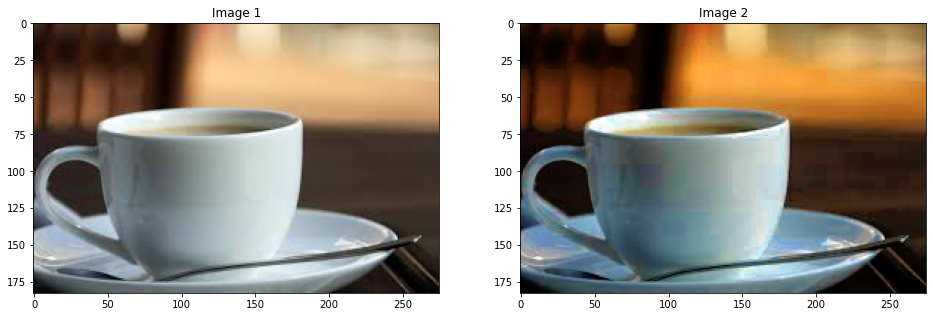

In [18]:
# Convert Image into HSV color spaces
image_hsv = cv2.cvtColor(image_color, cv2.COLOR_RGB2HSV)
# Apply histogram equalization
channel = 1
image_hsv[:, :, channel] = cv2.equalizeHist(image_hsv[:, :, channel])
channel = 2
image_hsv[:, :, channel] = cv2.equalizeHist(image_hsv[:, :, channel])
# Convert to RGB
image_enhanced = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)
ShowTwoImages(image_color, image_enhanced)

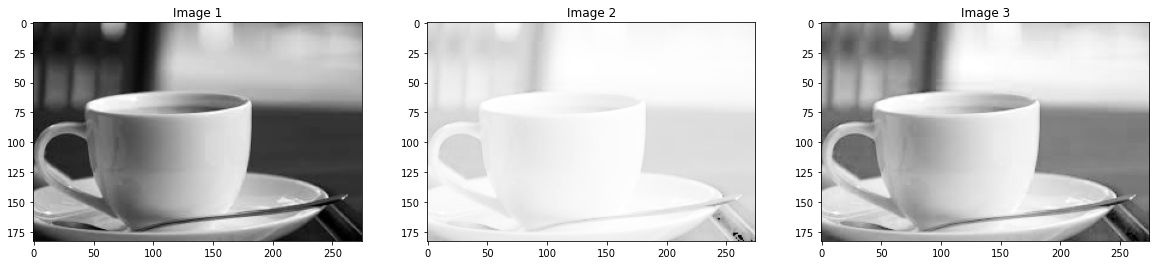

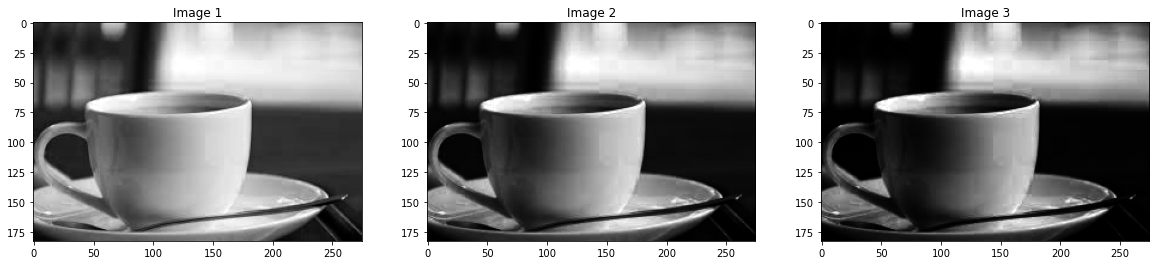

In [19]:
image_hsv = cv2.cvtColor(image_color, cv2.COLOR_RGB2HSV)
img = image_hsv[:,:,2]
gamma = [0.1, 0.5, 1.2, 2.2, 3.2]
gamma_corrected_01 = np.array(255*(img / 255) ** gamma[0], dtype = 'uint8') 
gamma_corrected_02 = np.array(255*(img / 255) ** gamma[1], dtype = 'uint8') 
gamma_corrected_03 = np.array(255*(img / 255) ** gamma[2], dtype = 'uint8') 
gamma_corrected_04 = np.array(255*(img / 255) ** gamma[3], dtype = 'uint8')
gamma_corrected_05 = np.array(255*(img / 255) ** gamma[4], dtype = 'uint8')
ShowThreeImages(image_gray, gamma_corrected_01, gamma_corrected_02)
ShowThreeImages(gamma_corrected_03, gamma_corrected_04, gamma_corrected_05)

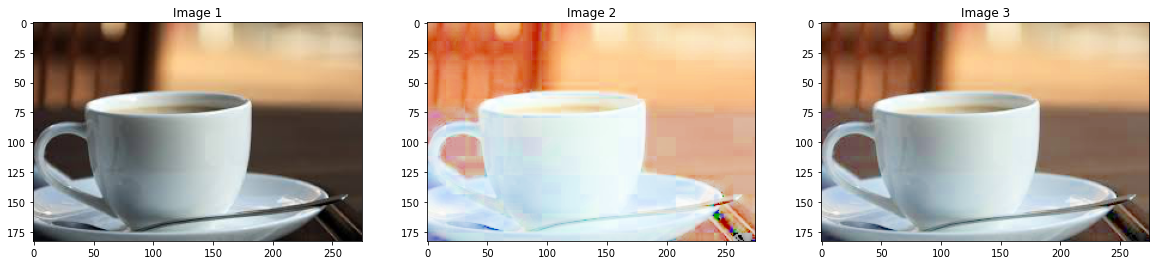

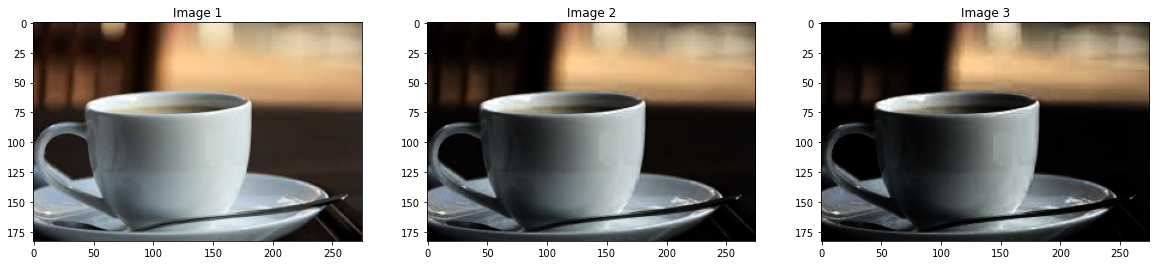

In [20]:
channel = 2
image_hsv_01 = image_hsv.copy()
image_hsv_01[:,:,2] = gamma_corrected_01
image_enhanced_01 = cv2.cvtColor(image_hsv_01, cv2.COLOR_HSV2RGB)
image_hsv_02 = image_hsv.copy()
image_hsv_02[:,:,2] = gamma_corrected_02
image_enhanced_02 = cv2.cvtColor(image_hsv_02, cv2.COLOR_HSV2RGB)
image_hsv_03 = image_hsv.copy()
image_hsv_03[:,:,2] = gamma_corrected_03
image_enhanced_03 = cv2.cvtColor(image_hsv_03, cv2.COLOR_HSV2RGB)
image_hsv_04 = image_hsv.copy()
image_hsv_04[:,:,2] = gamma_corrected_04
image_enhanced_04 = cv2.cvtColor(image_hsv_04, cv2.COLOR_HSV2RGB)
image_hsv_05 = image_hsv.copy()
image_hsv_05[:,:,2] = gamma_corrected_05
image_enhanced_05 = cv2.cvtColor(image_hsv_05, cv2.COLOR_HSV2RGB)

ShowThreeImages(image_color, image_enhanced_01, image_enhanced_02)
ShowThreeImages(image_enhanced_03, image_enhanced_04, image_enhanced_05)

In [21]:
# With (r1, s1), (r2, s2) as parameters, the function stretches the intensity levels 
# by essentially decreasing the intensity of the dark pixels and increasing the intensity 
# of the light pixels. If r1 = s1 = 0 and r2 = s2 = L-1, the function becomes a straight 
# dotted line in the graph (which gives no effect). 
# The function is monotonically increasing so that the order of intensity levels between pixels 
# is preserved.
# Function to map each intensity level to output intensity level. 
def pixelValTransformation(pix, r1, s1, r2, s2): 
    if (0 <= pix and pix <= r1): 
        return (s1 / r1)*pix 
    elif (r1 < pix and pix <= r2): 
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1 
    else: 
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2 

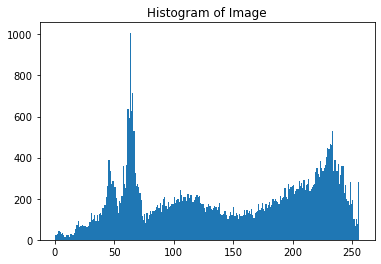

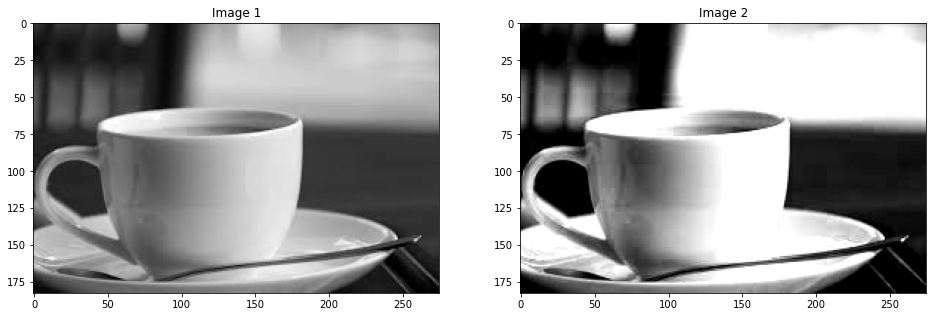

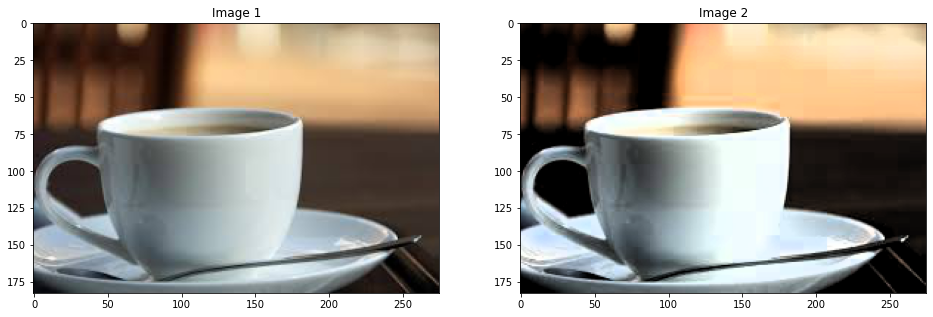

In [22]:
image_hsv = cv2.cvtColor(image_color, cv2.COLOR_RGB2HSV)
image_hsv_value = image_hsv[:,:,2]

hist = cv2.calcHist([image_hsv_value],[0],None,[256],[0,256])
plt.hist(image_hsv_value.ravel(),256,[0,256])
plt.title('Histogram of Image')
plt.show()

# Define parameters. 
r1 = 50
s1 = 0
r2 = 200
s2 = 255

# Vectorize the function to apply it to each value in the Numpy array. 
pixelVal_vec = np.vectorize(pixelValTransformation) 
# Apply contrast stretching. 
contrast_stretched = pixelVal_vec(image_hsv_value, r1, s1, r2, s2) 

image_hsv[:,:,2] = contrast_stretched
image_enhanced = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)

ShowTwoImages(image_gray, contrast_stretched)
ShowTwoImages(image_color, image_enhanced)

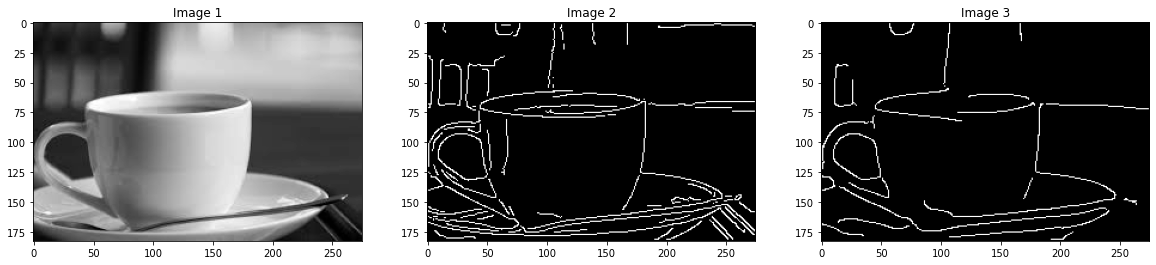

In [23]:
from skimage import feature
# sigma help to remove the noisy image in edge detection
image_edges_01 = feature.canny(image_gray)
image_edges_02 = feature.canny(image_gray, sigma=3)
ShowThreeImages(image_gray, image_edges_01, image_edges_02)